## Aufgabe

Clustern Sie den MNIST-Datensatz handgeschriebener Ziffern mit Hilfe von K-Means und visualisieren Sie die Prototypen.

### Zusatzaufgabe

Trainieren Sie einen k-Nearest-Neighbor-Klassifikator, um den Prototypen einen Label zuzuweisen. Verwenden sie nun die gelabelten Prototypen als Datengrundlage für einen weiteren k-Nearest-Neighbor-Klassifikator. Wie unterscheiedet sich die Klassifikationsgüte, welchen Einfluss hat dieser Ansatz auf die Laufzeit?

In [1]:
import gzip
import os
import numpy as np

train_data = os.path.join("..", "DataSets", "mnist", 
                          "train-images-idx3-ubyte.gz")
train_labels = os.path.join("..", "DataSets", "mnist", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("..", "DataSets", "mnist", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("..", "DataSets", "mnist", "t10k-labels-idx1-ubyte.gz")

In [2]:
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)
y_train = mnist_labels(train_labels)

X_test = mnist_images(test_data)
y_test = mnist_labels(test_labels)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


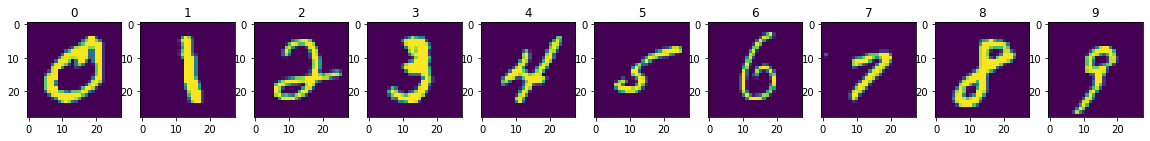

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

f,ax = plt.subplots(1,10)
f.set_size_inches(20,4)

for i in range(0,10):
    plt.sca(ax[i])
    plt.imshow(X_train[y_train==i,:,:][1])
    plt.title(i)
